In [8]:
from TimeSeries_impact.ts_analysis import tsa
from TimeSeries_impact import synthetic_ts
from TimeSeries_impact.ts_impact import impact_power
from TimeSeries_impact.ts_impact import feature_creation

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Time series analysis

In [2]:
data = synthetic_ts.make_time_series(200)

# add some missing data
data["data"].iloc[100:120, 0] = None

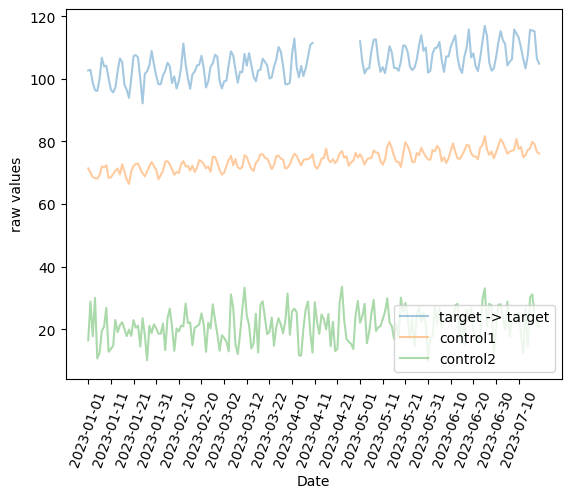

In [3]:
# check missing data
ts = tsa.TSA(data["data"])
ts.decompose()
ts.plot(with_trend=False, scaled=False)

c:\Users\milai\Codes\Time_series_impact\.venv\Lib\site-packages\statsmodels\tsa\filters\hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


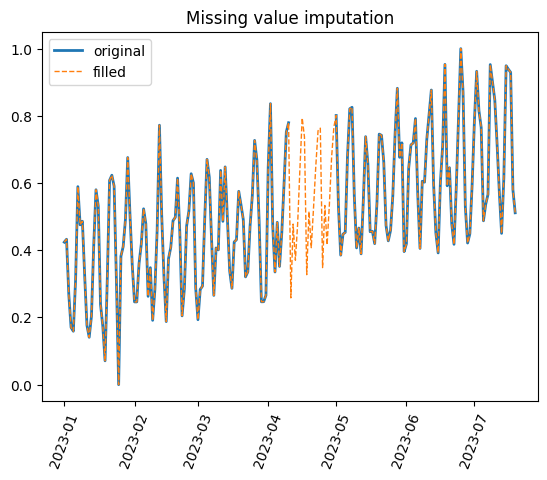

In [4]:
# fill in missing data
new_data = ts.fill_data(plot=True)

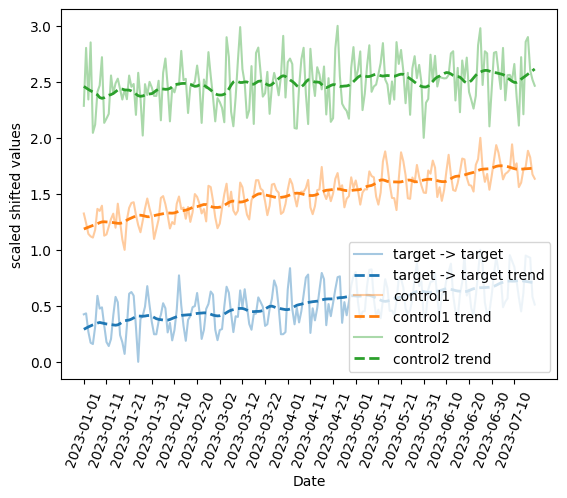

In [5]:

# plot
ts.plot(scaled=True, shifted=True, with_trend=True)


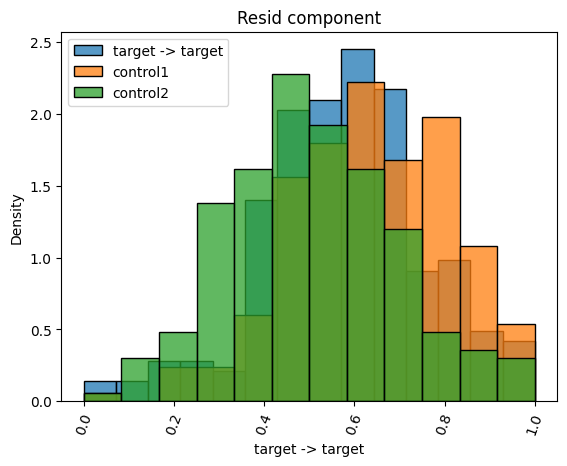

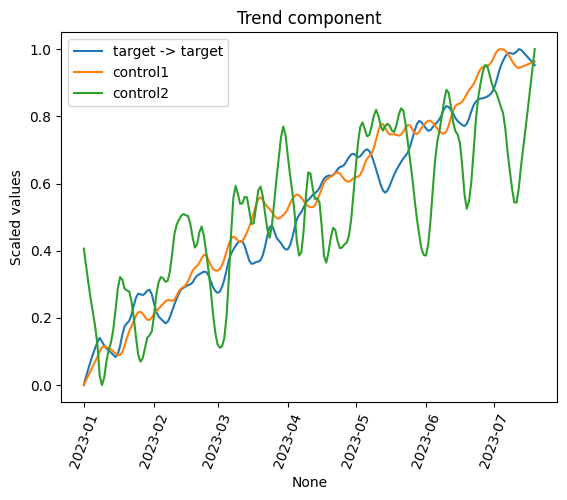

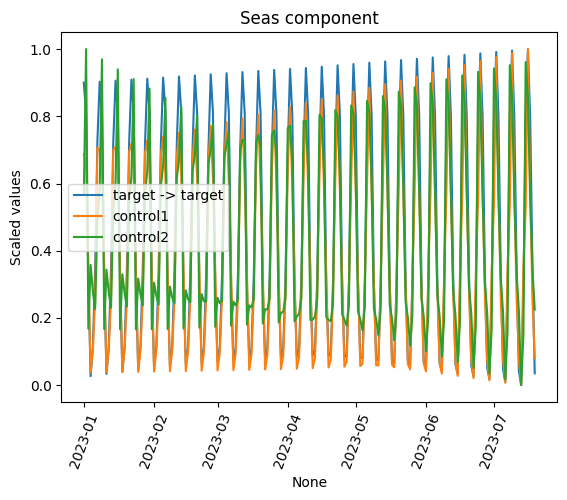

In [6]:
ts.plot_components()

In [ ]:
res_simi, seas_simi = ts.get_components_similarity()
raw_simi = ts.get_data_similarity()

print("Similarity between redidual components: ")
print(res_simi)
print()

print("Similarity between seasonal components: ")
print(seas_simi)
print()

print("Similarity between raw data: ")
print(raw_simi)

Similarity between redidual components: 
                           control1  control2
KL Divergence              0.540171  0.737391
Jensen-Shannon Divergence  0.039180  0.063725
Bhattacharyya Distance     0.043572  0.075541
MSE                        0.065357  0.081790
Cosine Similarity          0.922173  0.881587

Similarity between seasonal components: 
     control1  control2
dtw  0.147859  0.091377

Similarity between raw data: 
               control1      control2
euclidean  1.734915e+00  3.234698e+00
MAPE       1.102328e+07  2.903045e+07
pearson    8.080901e-01  4.045444e-01
dtw        6.422796e-03  1.007602e-02


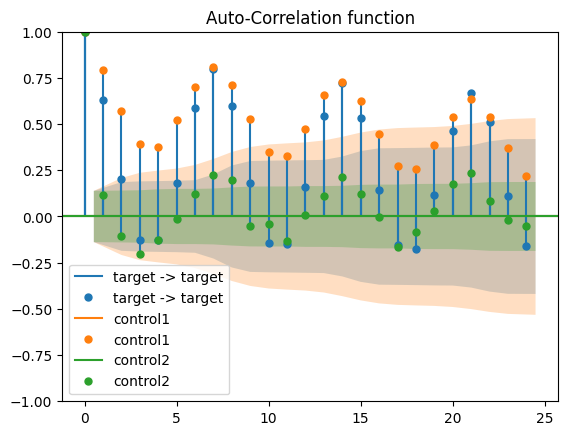

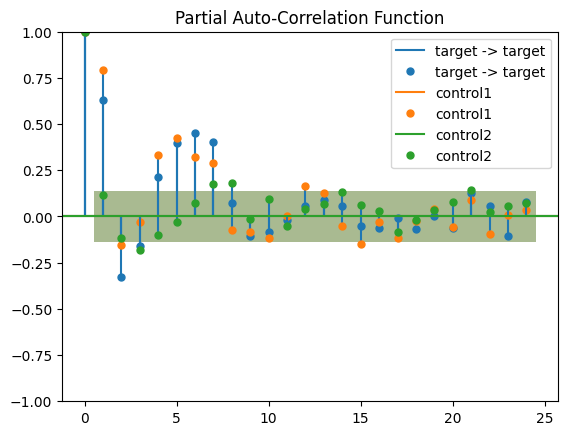

In [8]:
ts.plot_autocorrelation()

# Power analysis and simulations

In [9]:
# replace missings
data = synthetic_ts.make_time_series(200)

In [ ]:
# create impact object with UC - MLE model
imp = impact_power.SimImpact(data["data"]) # raw data
imp_trend = impact_power.SimImpact(data["data"])    # trend data

In [ ]:
# define impact scenarios
relup_list = np.linspace(0, 0.2, 10)
test_size = 30

# simulate impact
imp.make_sim(relup_list, test_size)
imp_trend.make_sim(relup_list, test_size, on_trend=True, split_decomposition=False)

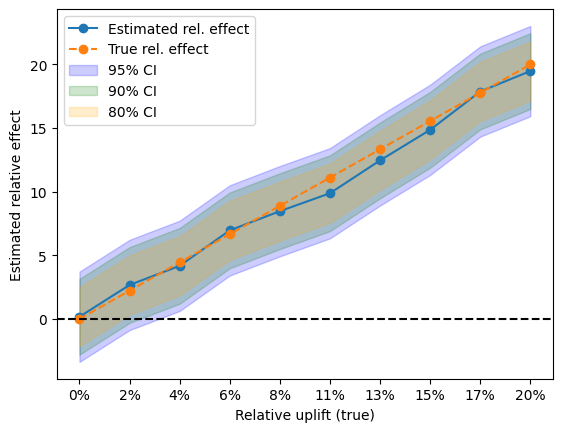

In [12]:
imp.plot_sim_rel()

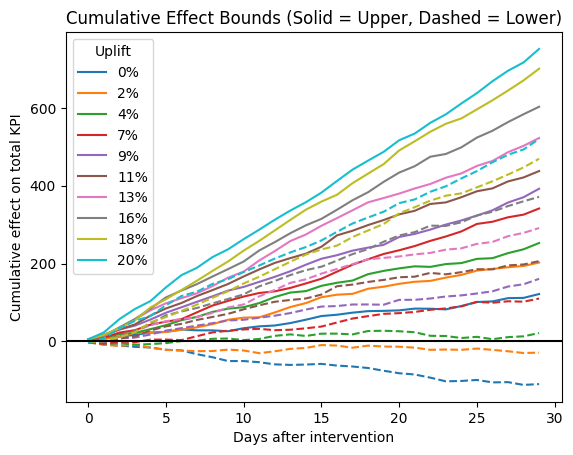

In [13]:
imp.plot_sim_cum()

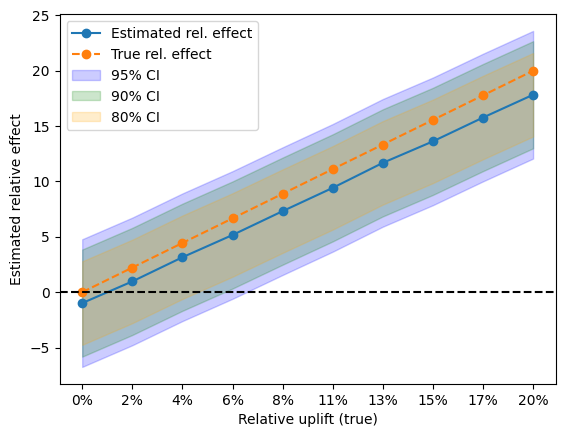

In [14]:
imp_trend.plot_sim_rel()

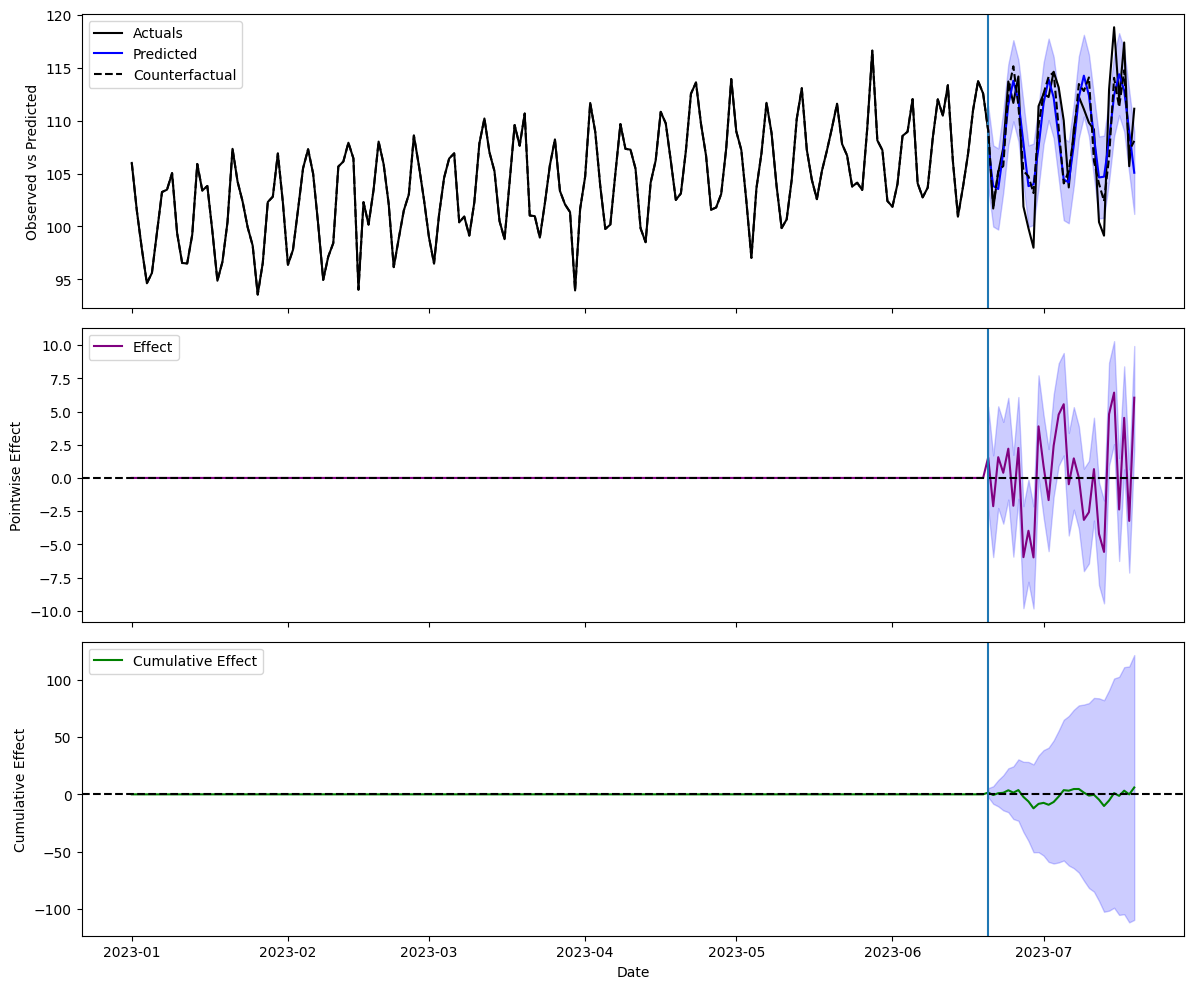

In [15]:
imp.res_sim[0]["chart"]

In [ ]:
# perform pseudo powe analysis using Monte Carlo simulations on many scenarios
res_power = imp.power_analyse()

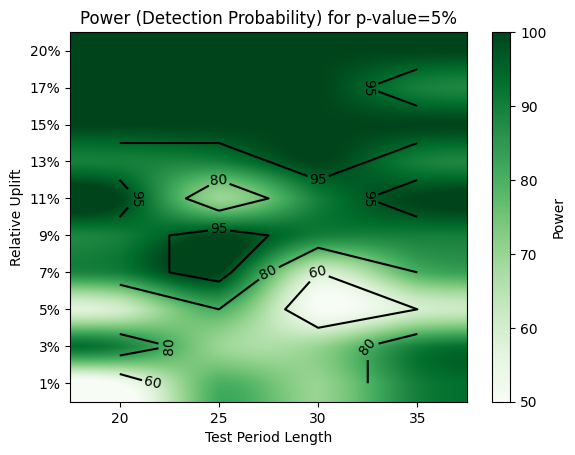

In [17]:
imp.plot_power(alpha=5)

# PyBats Backend

In [32]:
from TimeSeries_impact.ts_impact import causal_impact_pybats
from TimeSeries_impact.utilities import add_effect


data = synthetic_ts.make_time_series(200)

data_tmp = data["data"]
test_size = 30
pre_period = [data_tmp.index[0], data_tmp.index[-1 - test_size]]
post_period = [data_tmp.index[-test_size], data_tmp.index[-1]]

# add effect to post period
data_tmp["target"] = add_effect(data_tmp["target"], up=0.01*np.mean(data_tmp["target"]), test_size=test_size)

In [33]:
# add features  
data_tmp = feature_creation.add_day_of_week(data_tmp)


In [34]:
#  fit model
bats = causal_impact_pybats.CausalImpactBayes(data_tmp, pre_period, post_period, standardize_controls=True)
bats.run()

beginning forecasting


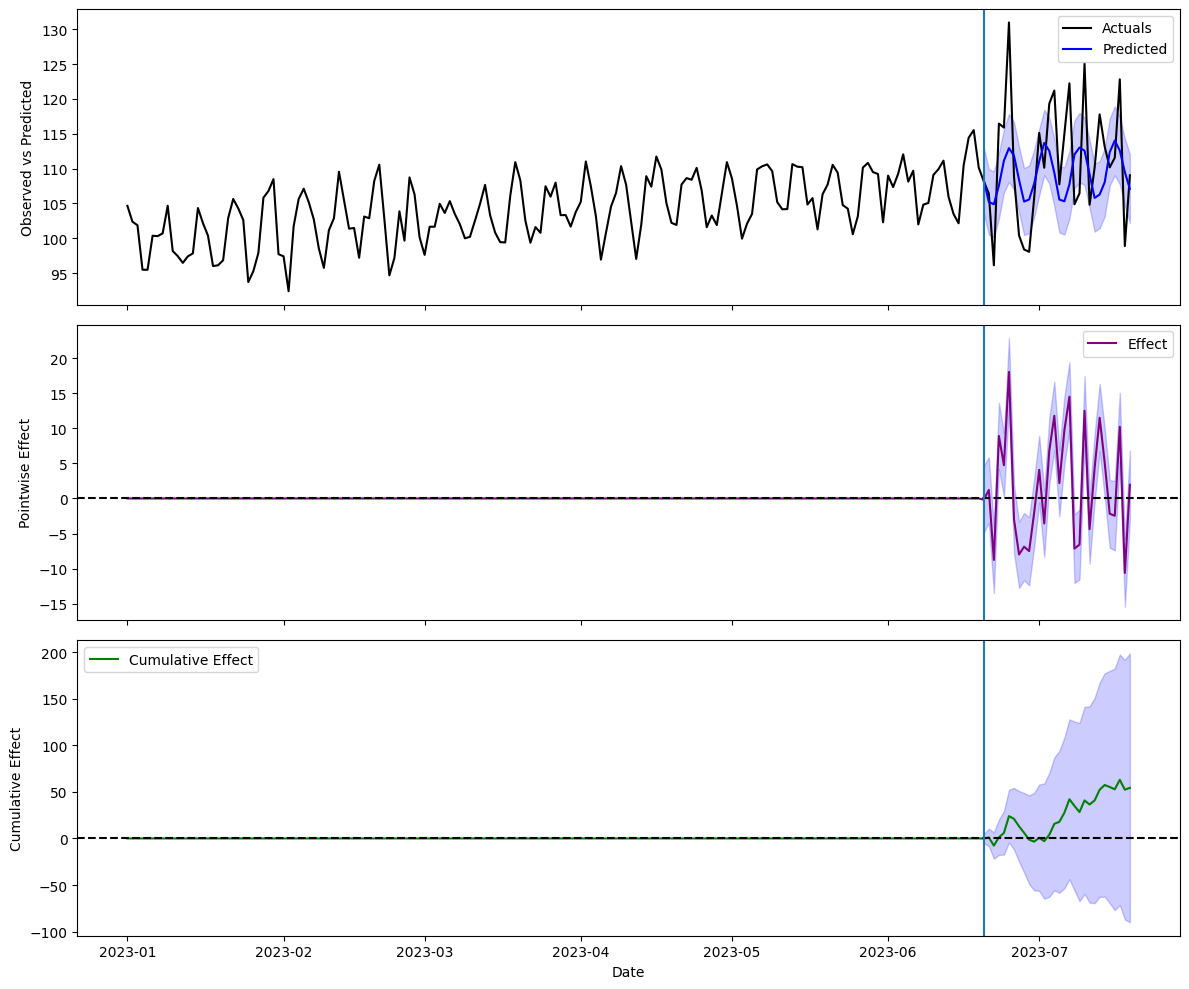

In [35]:
bats.plot()

In [37]:
bats_model_params = bats.get_model_params()

# # PyBats is dynamic model, parameters change over time
# # Here we take the last time point's parameters as an example

print("Trend components")
print(bats_model_params["trend"][-1, :])
print()

print("Seasonal components")
print(bats_model_params["seasonal"][-1, :])
print()

print("Control regression components")
print(bats_model_params["regression"][-1, :])
print()

Trend components
[1.07327825e+02 3.67760235e-02]

Seasonal components
[[ 2.35910534 -2.16697101]]

Control regression components
[0.92690978 0.22400272 0.0425087 ]



# mle backend

In [7]:
from TimeSeries_impact.ts_impact import CausalImpactMLE
from  TimeSeries_impact import synthetic_ts

data = synthetic_ts.make_time_series(200)

data_tmp = data["data"]
test_size = 30
pre_period = [data_tmp.index[0], data_tmp.index[-1 - test_size]]
post_period = [data_tmp.index[-test_size], data_tmp.index[-1]]

mle = CausalImpactMLE(data_tmp, pre_period, post_period, standardize_controls=True)
mle.run()

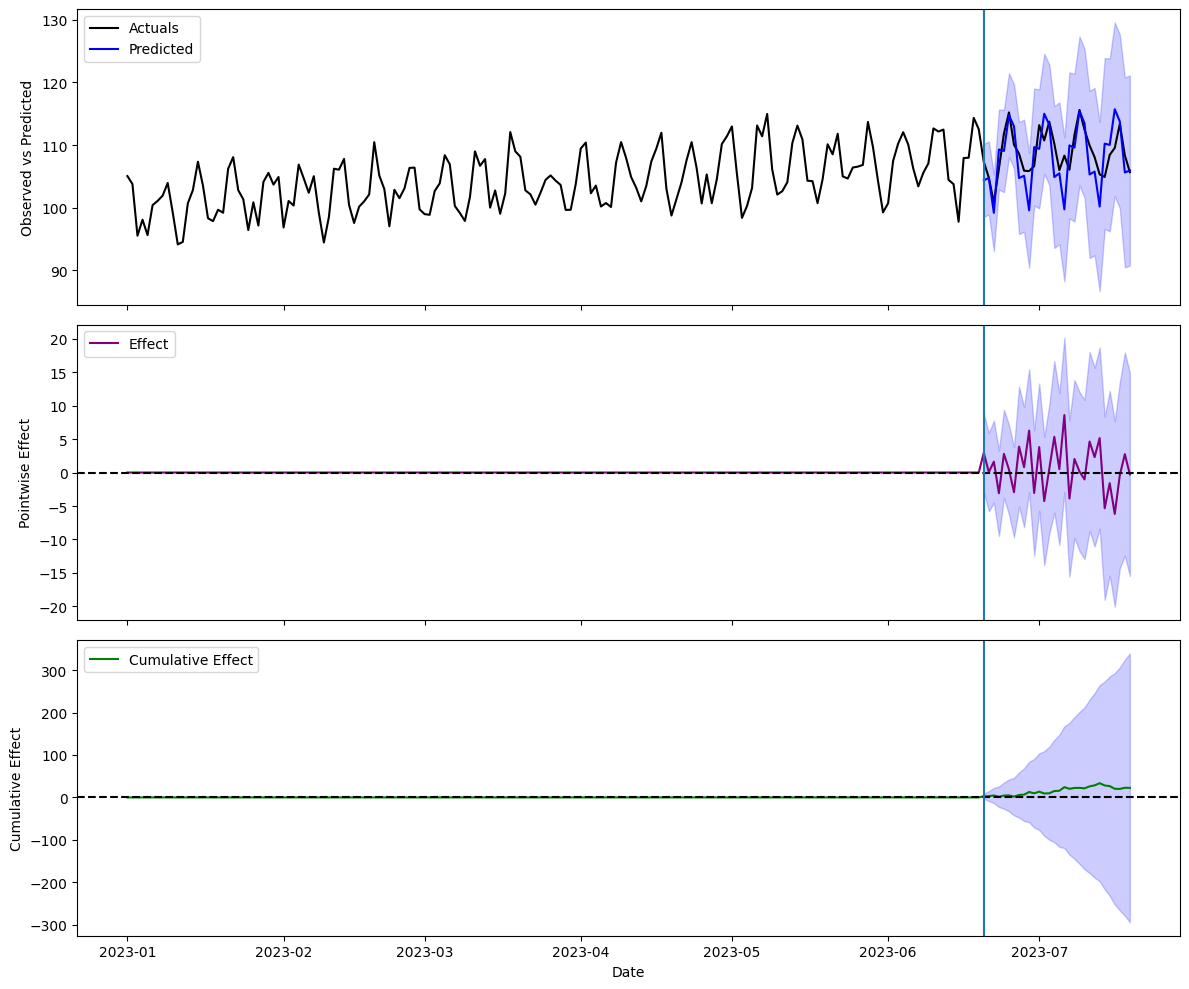

In [8]:
mle.plot()

In [9]:
mle.get_model_params()

sigma2.level       8.820355e-01
sigma2.trend       3.166062e-11
sigma2.seasonal    2.673154e+00
beta.control1     -6.168985e-02
beta.control2      5.914584e-03
dtype: float64